In [1]:
import torch
from einops import rearrange

#### einops - `rearrange`

In [2]:
Q = torch.randn(1, 4, 6)
print('[B W E]:',Q.shape)
display(Q)

# [B, W, E]
# -> [B, H, W, E/H]
Q = rearrange(Q, 'B W (H E) -> B H W E', H=3)
print('[B H W E]:',Q.shape)
display(Q)

# [B, H, W, E/H]
# -> [B, W, E]
Q = rearrange(Q, 'B H W E -> B W (H E)')
print('[B W E]:',Q.shape)
display(Q)

[B W E]: torch.Size([1, 4, 6])


tensor([[[-1.6202,  1.4058, -2.1206,  1.2865, -1.3743, -0.9293],
         [-1.6587, -0.8202, -1.1361,  0.1273,  0.2318, -0.2339],
         [ 0.9029, -1.9165, -0.2175, -1.2608,  0.3862, -0.6368],
         [-0.5553, -0.3454, -1.1998,  0.5936, -0.1883,  0.5458]]])

[B H W E]: torch.Size([1, 3, 4, 2])


tensor([[[[-1.6202,  1.4058],
          [-1.6587, -0.8202],
          [ 0.9029, -1.9165],
          [-0.5553, -0.3454]],

         [[-2.1206,  1.2865],
          [-1.1361,  0.1273],
          [-0.2175, -1.2608],
          [-1.1998,  0.5936]],

         [[-1.3743, -0.9293],
          [ 0.2318, -0.2339],
          [ 0.3862, -0.6368],
          [-0.1883,  0.5458]]]])

[B W E]: torch.Size([1, 4, 6])


tensor([[[-1.6202,  1.4058, -2.1206,  1.2865, -1.3743, -0.9293],
         [-1.6587, -0.8202, -1.1361,  0.1273,  0.2318, -0.2339],
         [ 0.9029, -1.9165, -0.2175, -1.2608,  0.3862, -0.6368],
         [-0.5553, -0.3454, -1.1998,  0.5936, -0.1883,  0.5458]]])

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#### 내적의 표본(개수)가 많아질수록 분산이 커진다
> Attention 의 $\frac{QK^T}{\sqrt{d_k}}V$ 에서 softmax로 들어갈때 분산이 크면 grad가 작아짐

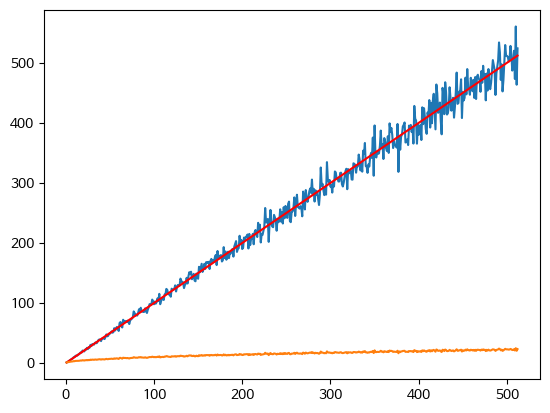

In [5]:
n=torch.arange(1,513)
N=1000
result=[]
for ni in n:
    inner_prod = torch.zeros(N)
    for i in range(N):
        inner_prod[i] = torch.randn(ni,1).T@torch.randn(ni,1) # 내적값을 N번 구해서 var 구해보자
    result += [torch.var(inner_prod)]
    
result_scaling = [r/(i+1)**(0.5) for i, r in enumerate(result)]

plt.plot(n,result)
plt.plot(n,n,'r') 
plt.plot(n,result_scaling) # variance 가 점점커지니까 std로 나눠서 unit variance로 만들자는 것!

#### expand_as, nn.Embedding

In [8]:
import torch.nn as nn

In [9]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'

src = torch.randint(0,65000,(3,5)) # 개단
pos = torch.arange(5).expand_as(src).to(DEVICE)
print(src)
print(pos)

tensor([[15745, 37571, 42015, 50518, 14139],
        [61120, 34454, 57286, 35256, 44922],
        [36980, 30102, 22212, 23280, 27382]])
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]], device='cuda:0')


In [10]:
# nn.Embedding 실험
emb=nn.Embedding(10,5) # one-hot encoding 된 벡터가 통과된다는 것이 약속된 상태의 FC layer 인 것
print(emb.weight.shape) # weight 개수는 nn.Linear(10,5) 과 동일! 동작 방식이 다른 것
print(emb(torch.tensor(2)))

print(emb(torch.tensor([[6,1,2],[2,1,7]]))) # 2 개 문장, 3개 단어
print(emb(torch.tensor([[6,1,2],[2,1,7]])).shape)

torch.Size([10, 5])
tensor([ 0.0216,  0.0607, -1.3041,  1.0680, -0.3328],
       grad_fn=<EmbeddingBackward0>)
tensor([[[-1.1116,  1.0649, -0.2759, -0.6527, -0.4563],
         [-1.0054,  1.4511,  1.7159,  0.7865, -1.0344],
         [ 0.0216,  0.0607, -1.3041,  1.0680, -0.3328]],

        [[ 0.0216,  0.0607, -1.3041,  1.0680, -0.3328],
         [-1.0054,  1.4511,  1.7159,  0.7865, -1.0344],
         [ 1.4485, -1.4966, -0.2713, -0.5004,  2.4719]]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([2, 3, 5])


#### `tril`

In [14]:
x = torch.ones(2,1,5,5)
x = torch.tril(x) # tril: lower triangular
print(x)

tensor([[[[1., 0., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0.],
          [1., 1., 1., 1., 0.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 0., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [1., 1., 1., 0., 0.],
          [1., 1., 1., 1., 0.],
          [1., 1., 1., 1., 1.]]]])
